In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv(r"C:\Users\fatem\OneDrive\Desktop\PROJECT\cost_revenue.csv")

In [3]:
print(data)

      Rank Release_Date                     Movie_Title USD_Production_Budget  \
0     5293     8/2/1915           The Birth of a Nation              $110,000   
1     5140     5/9/1916                     Intolerance              $385,907   
2     5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3     5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4     5222     1/1/1925                  The Big Parade              $245,000   
...    ...          ...                             ...                   ...   
5386  2950    10/8/2018                             Meg           $15,000,000   
5387   126   12/18/2018                         Aquaman          $160,000,000   
5388    96   12/31/2020                     Singularity          $175,000,000   
5389  1119   12/31/2020          Hannibal the Conqueror           $50,000,000   
5390  2517   12/31/2020  Story of Bonnie and Clyde, The           $20,000,000   

     USD_Worldwide_Gross US

In [4]:
data.shape

(5391, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [6]:
data.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
134,4757,1/1/1968,Shalako,"$1,455,000","$2,620,000","$2,620,000"


In [7]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [8]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [9]:
data.isna().values.any()

False

In [10]:
data.duplicated().values.any()

False

In [11]:
duplicated_rows = data[data.duplicated()]

In [12]:
len(duplicated_rows)

0

In [13]:
char_to_remove = [',','$']
data_to_clean = ["USD_Production_Budget","USD_Worldwide_Gross","USD_Domestic_Gross"]
for col in data_to_clean:
    for char in char_to_remove:
        data[col] = data[col].astype(str).str.replace(char, "")
    data[col] = pd.to_numeric(data[col])


C:\Users\fatem\AppData\Local\Temp\ipykernel_16844\96717164.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


In [14]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [15]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [16]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [17]:
data[data.USD_Production_Budget == 1.100000e+03]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [18]:
data[data.USD_Production_Budget == 4.250000e+08]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [19]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)} ')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512 


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [20]:
zero_domestic = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_domestic)} ')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357 


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [21]:
international_releases = data.loc[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]
print(f'Number of films made money internationally {len(international_releases)}')


Number of films made money internationally 155


In [22]:
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [23]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of films made money internationally {len(international_releases)}')
international_releases.tail()

Number of films made money internationally 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


In [24]:
scrape_date = pd.Timestamp('2018-5-1')
future_release = data[data.Release_Date >= scrape_date]
print(f' Number of unreleased movies {len(future_release)}')
future_release

 Number of unreleased movies 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [25]:
clean_data = data.drop(future_release.index)

In [26]:
money_lose = clean_data.query('USD_Production_Budget > USD_Worldwide_Gross')
len(money_lose)/len(clean_data)

0.37277117384843983

In [27]:
clean_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


<function matplotlib.pyplot.show(close=None, block=None)>

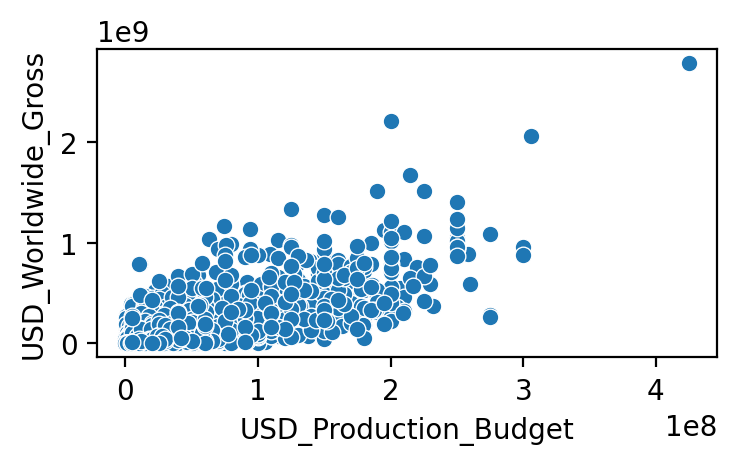

In [28]:
plt.figure(figsize=(4,2), dpi=200)



sns.scatterplot(data = clean_data, x = 'USD_Production_Budget',
                y= 'USD_Worldwide_Gross')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

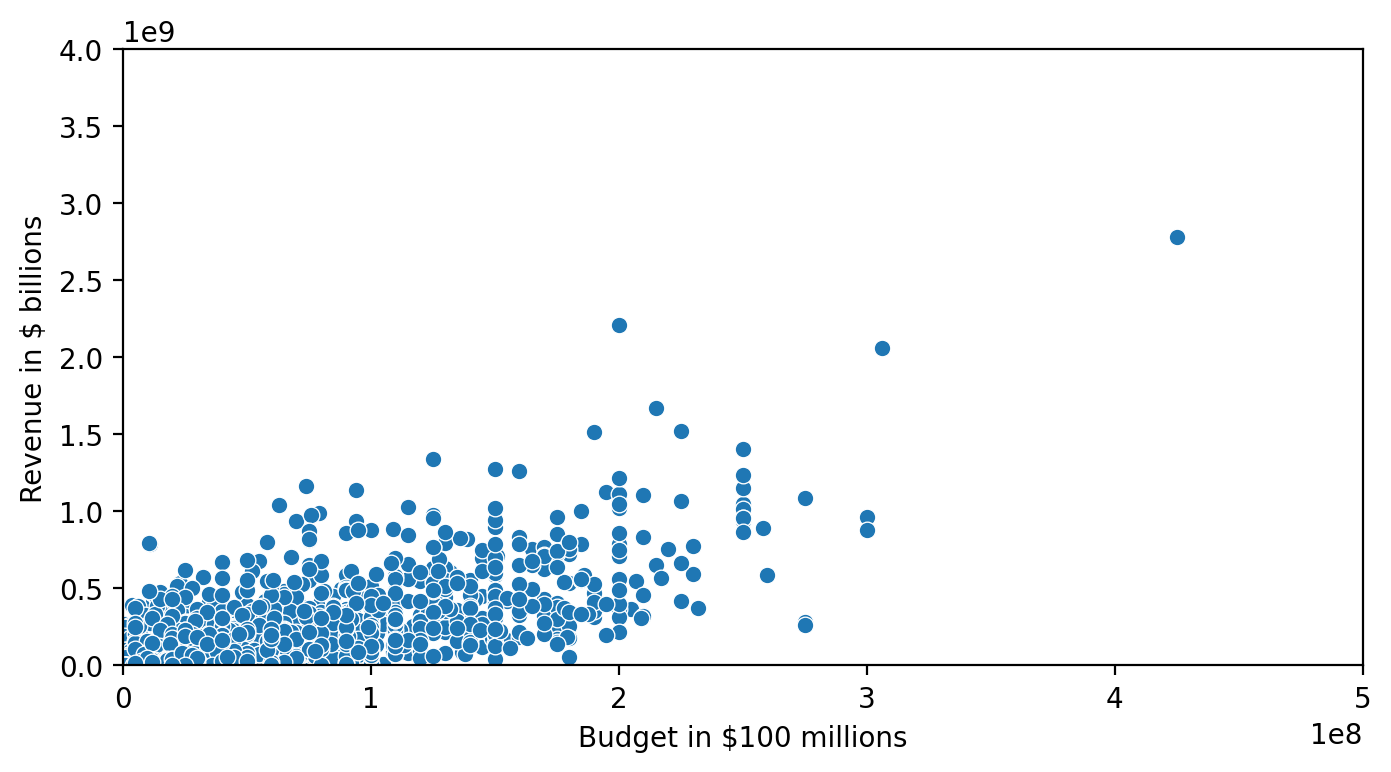

In [29]:
plt.figure(figsize=(8,4), dpi=200)



ax = sns.scatterplot(data = clean_data, x = 'USD_Production_Budget',
                y= 'USD_Worldwide_Gross')
ax.set (ylim= (0,4000000000), xlim = (0,500000000),ylabel = 'Revenue in $ billions',
        xlabel ='Budget in $100 millions' )

plt.show

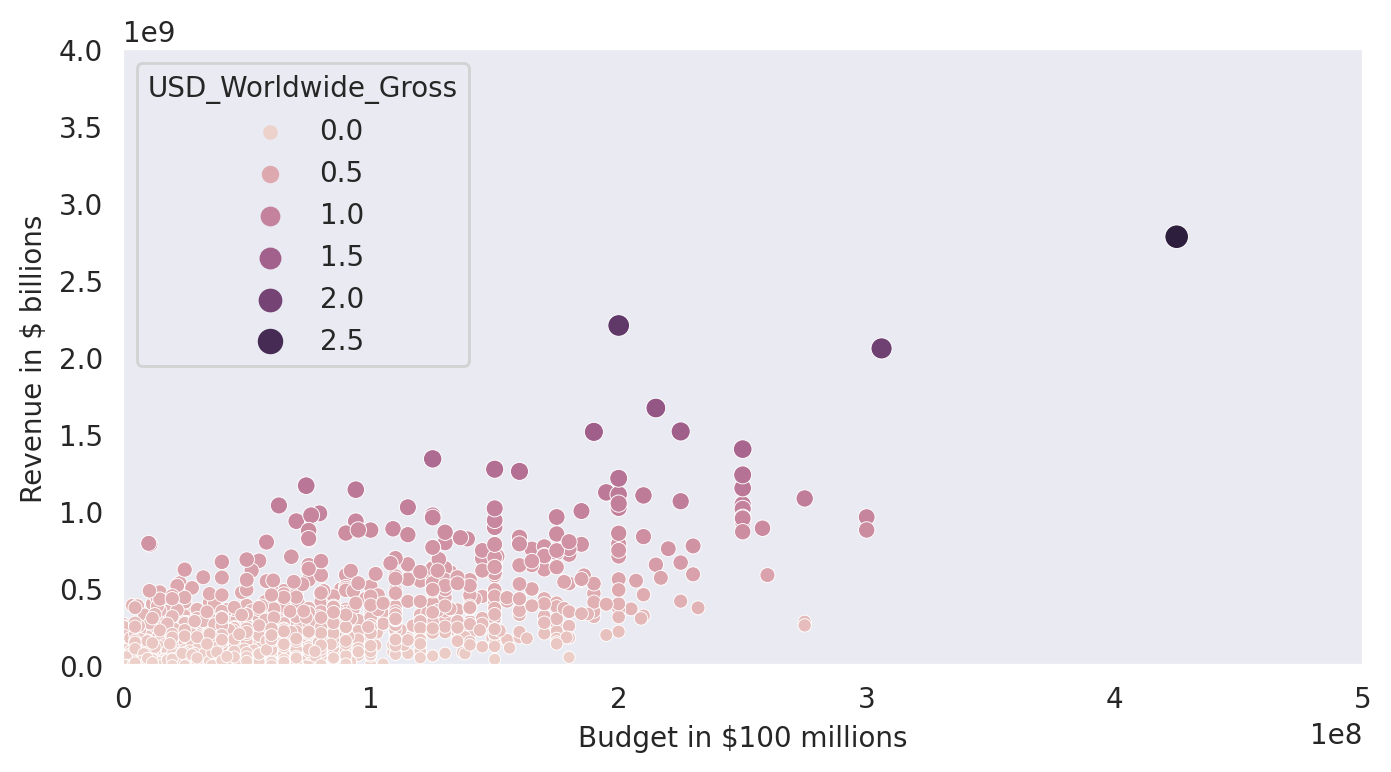

In [30]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('dark'):

        ax = sns.scatterplot(data = clean_data, x = 'USD_Production_Budget',
                        y= 'USD_Worldwide_Gross', hue='USD_Worldwide_Gross',size='USD_Worldwide_Gross')
        ax.set (ylim= (0,4000000000), xlim = (0,500000000),ylabel = 'Revenue in $ billions',
                xlabel ='Budget in $100 millions' )

        plt.show

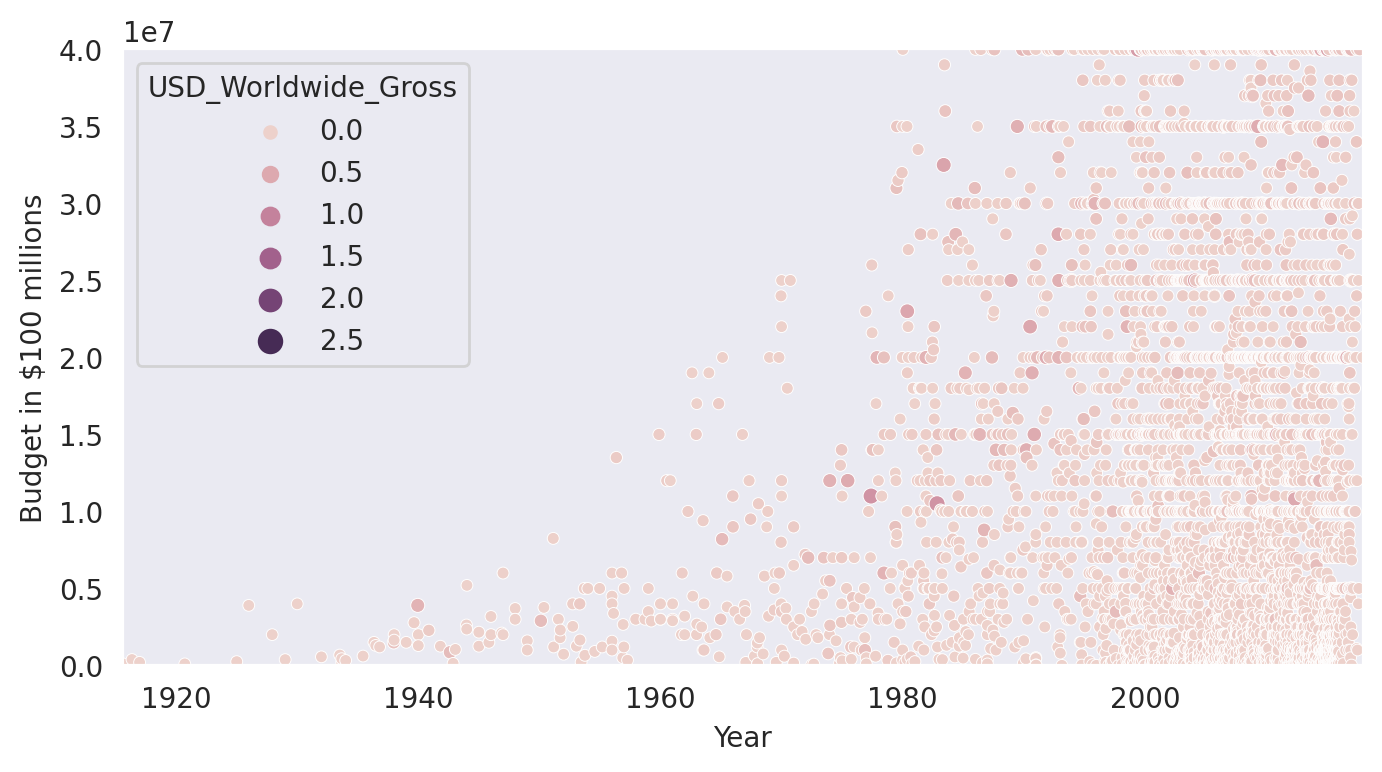

In [31]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('dark'):

        ax = sns.scatterplot(data = clean_data, x = 'Release_Date',
                                                y= 'USD_Production_Budget',
                                                hue='USD_Worldwide_Gross',
                                                size='USD_Worldwide_Gross')
        ax.set (ylim= (0,40000000), 
                xlim = (clean_data.Release_Date.min(),clean_data.Release_Date.max()),

                ylabel ='Budget in $100 millions',
                 xlabel = 'Year', )

        plt.show

In [32]:
dt_index = pd.DatetimeIndex(clean_data.Release_Date)
years = dt_index.year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [33]:
decades = years//10*10
clean_data['decades'] = decades
clean_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [34]:
old_films = clean_data[clean_data.decades<=1960]
old_films
new_films = clean_data[clean_data.decades>1960]
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [35]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
count,153.000000,1.530000e+02,1.530000e+02,1.530000e+02,153.000000
mean,4274.771242,4.611298e+06,3.041963e+07,2.238947e+07,1949.150327
std,742.137130,5.713649e+06,5.493183e+07,3.264175e+07,12.719014
min,1253.000000,1.000000e+05,0.000000e+00,0.000000e+00,1910.000000
25%,3973.000000,1.250000e+06,5.273000e+06,5.000000e+06,1940.000000
50%,4434.000000,2.900000e+06,1.000000e+07,1.000000e+07,1950.000000
75%,4785.000000,5.000000e+06,3.320810e+07,2.835000e+07,1960.000000
max,5299.000000,4.200000e+07,3.905252e+08,1.986805e+08,1960.000000


In [36]:
old_films.sort_values('USD_Production_Budget',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


In [37]:
new_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
count,5231.000000,5.231000e+03,5.231000e+03,5.231000e+03,5231.000000
mean,2651.997897,3.181144e+07,9.068350e+07,4.184192e+07,2000.187345
std,1549.334078,4.075858e+07,1.704250e+08,6.670273e+07,9.582253
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1970.000000
25%,1314.500000,5.000000e+06,3.831677e+06,1.252581e+06,2000.000000
50%,2629.000000,1.800000e+07,2.854412e+07,1.751012e+07,2000.000000
75%,3967.500000,4.000000e+07,9.877700e+07,5.330158e+07,2010.000000
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08,2010.000000


In [38]:
new_films.sort_values('USD_Production_Budget',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2000
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2010
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425,2000
4925,4,2015-06-11,Spectre,300000000,879620923,200074175,2010
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115,2010
...,...,...,...,...,...,...,...
1209,5387,1999-02-04,Following,6000,240495,48482,1990
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,2010
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0,2010


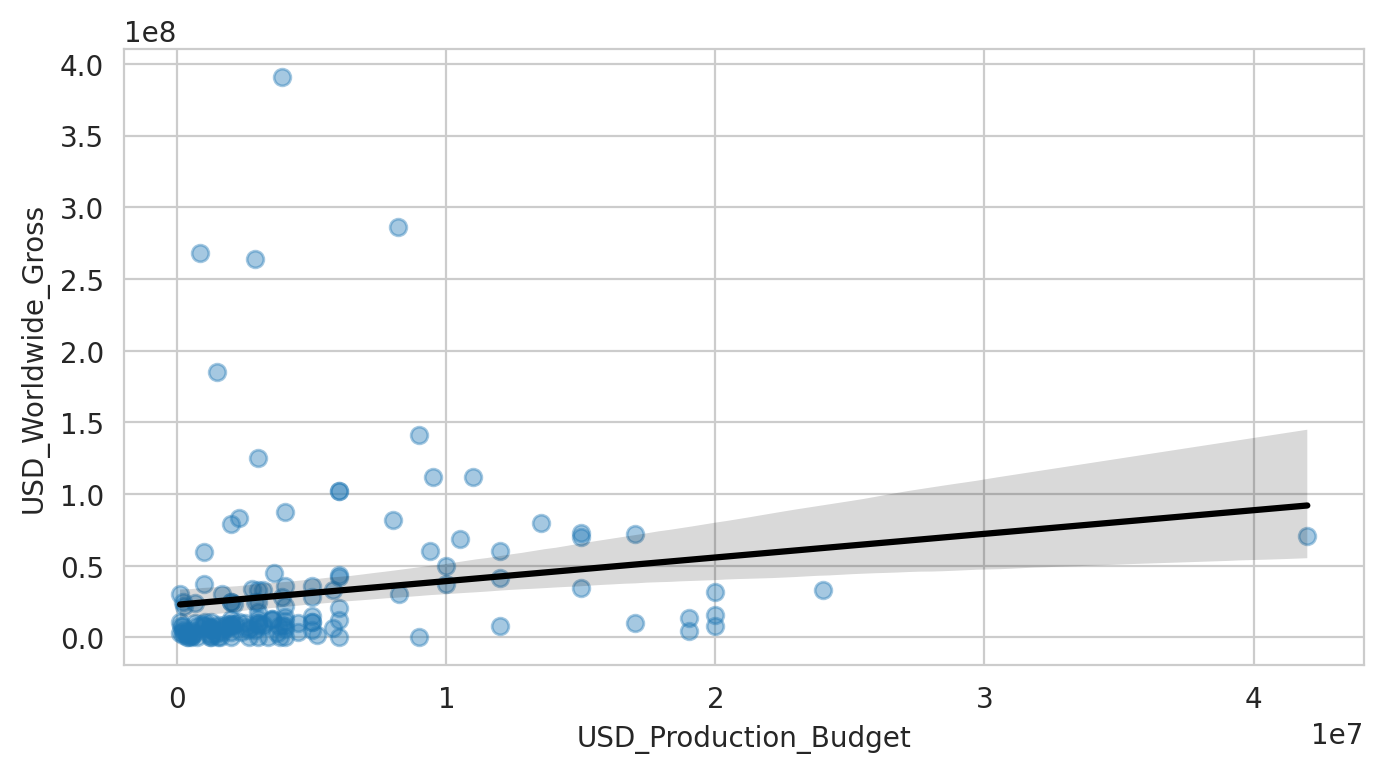

In [39]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

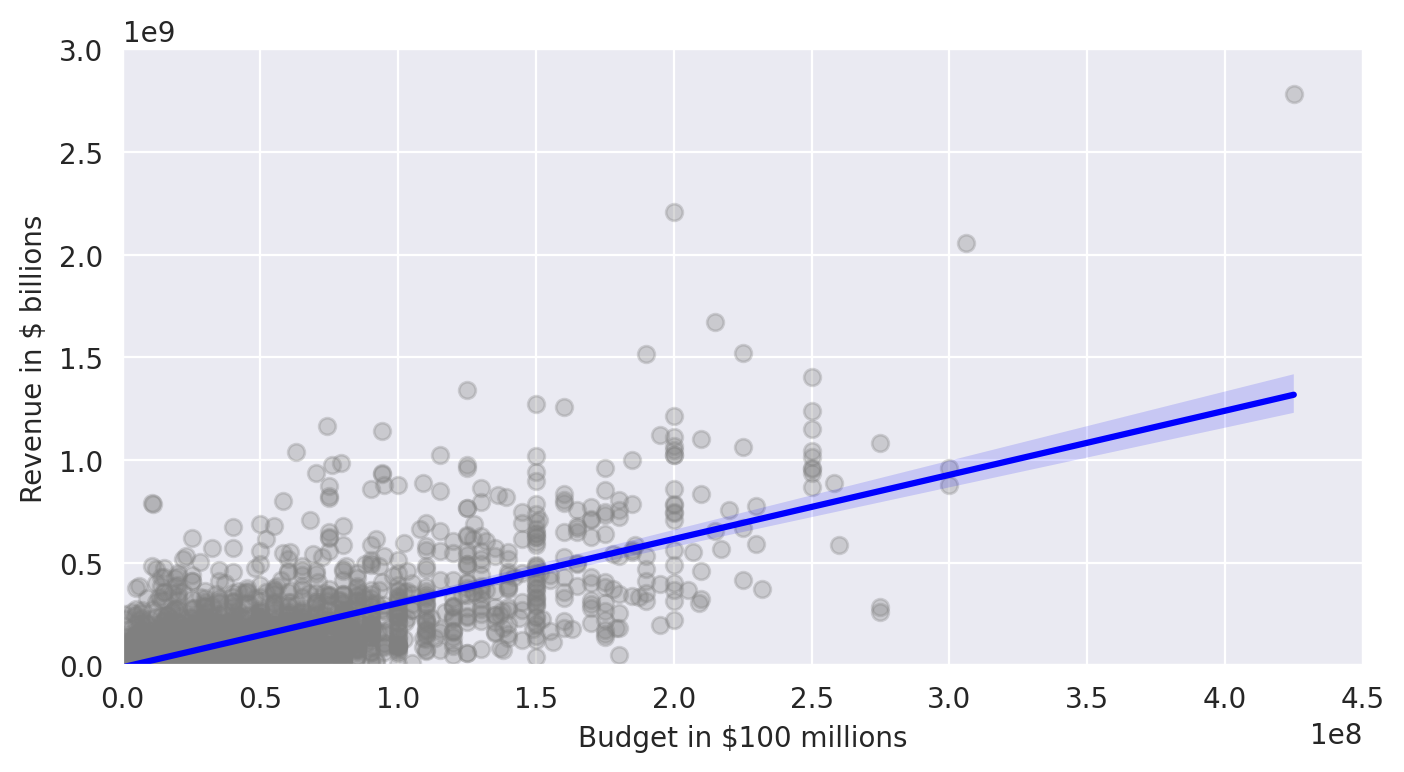

In [40]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='gray',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': 'blue'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

All in all, we can say that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue

In [41]:
regression = LinearRegression()

In [42]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])


In [43]:
regression.fit(X,y)


LinearRegression()

In [44]:
print(f'The slope intercept is: {regression.intercept_[0]}')
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The r-squared is: {regression.score(X,y)}')

The slope intercept is: -8650768.00661026
The slope coefficient is: [3.12259592]
The r-squared is: 0.5577032617720403


In [45]:
A = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
b = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [46]:
regression.fit(A,b)

LinearRegression()

In [47]:
print(f'The slope intercept is: {regression.intercept_[0]}')
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The r-squared is: {regression.score(A,b)}')

The slope intercept is: 22821538.635080382
The slope coefficient is: [1.64771314]
The r-squared is: 0.02937258620576877


In [48]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate,-8)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate}')

The estimated revenue for a $350 film is around $600000000.0
